<a href="https://colab.research.google.com/github/paolopetta/FIA-Yourbook/blob/main/Yourbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 


In [6]:
users = pd.read_csv('Users.csv', error_bad_lines=False, delimiter=';', encoding = 'ISO-8859-1')

In [7]:
users.shape

(278858, 3)

In [11]:
books = pd.read_csv('Books.csv', error_bad_lines=False, delimiter=';', engine = 'python' , encoding = 'ISO-8859-1')

Skipping line 815: ';' expected after '"'
Skipping line 1679: ';' expected after '"'
Skipping line 2531: ';' expected after '"'
Skipping line 2640: ';' expected after '"'
Skipping line 3236: ';' expected after '"'
Skipping line 3256: ';' expected after '"'
Skipping line 4906: ';' expected after '"'
Skipping line 6452: ';' expected after '"'
Skipping line 8349: ';' expected after '"'
Skipping line 9669: ';' expected after '"'
Skipping line 9723: ';' expected after '"'
Skipping line 10010: ';' expected after '"'
Skipping line 10192: ';' expected after '"'
Skipping line 10754: ';' expected after '"'
Skipping line 10824: ';' expected after '"'
Skipping line 10862: ';' expected after '"'
Skipping line 11442: ';' expected after '"'
Skipping line 11584: ';' expected after '"'
Skipping line 11859: ';' expected after '"'
Skipping line 12206: ';' expected after '"'
Skipping line 12229: ';' expected after '"'
Skipping line 12719: ';' expected after '"'
Skipping line 12885: ';' expected after '"'


In [12]:
books.shape

(51716, 8)

In [13]:
ratings = pd.read_csv('Ratings.csv', error_bad_lines=False, delimiter=';', engine = 'python' , encoding = 'ISO-8859-1')

Skipping line 21689: ';' expected after '"'
Skipping line 45329: ';' expected after '"'
Skipping line 45330: ';' expected after '"'
Skipping line 183262: ';' expected after '"'
Skipping line 210093: ';' expected after '"'
Skipping line 519785: unexpected end of data


In [14]:
ratings.shape

(519778, 3)

In [15]:
data = pd.merge(ratings, users, on='User-ID', how='inner')

In [16]:
data = pd.merge(data, books, on='ISBN', how='inner')

In [18]:
data.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Location', 'Age', 'Book-Title',
       'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [19]:
data.corr()

,User-ID,Book-Rating,Age,Year-Of-Publication
User-ID,1.000000,-0.012476,-0.005962,0.010569
Book-Rating,-0.012476,1.000000,-0.025589,-0.008313
Age,-0.005962,-0.025589,1.000000,0.013785
Year-Of-Publication,0.010569,-0.008313,0.013785,1.000000


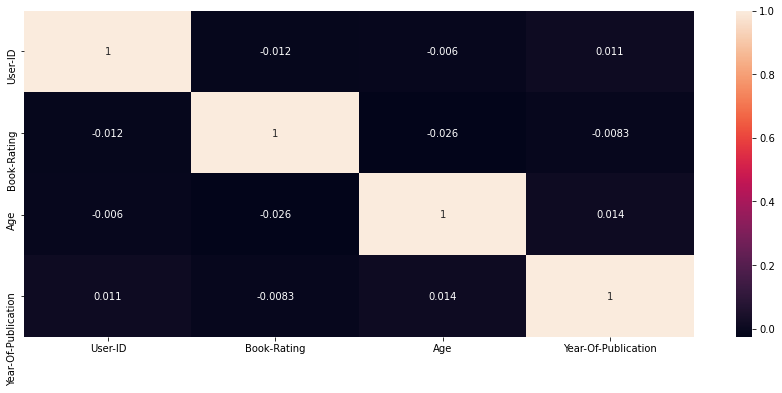

In [21]:
plt.figure(figsize = (15,6))
sns.heatmap( data.corr(), annot=True)

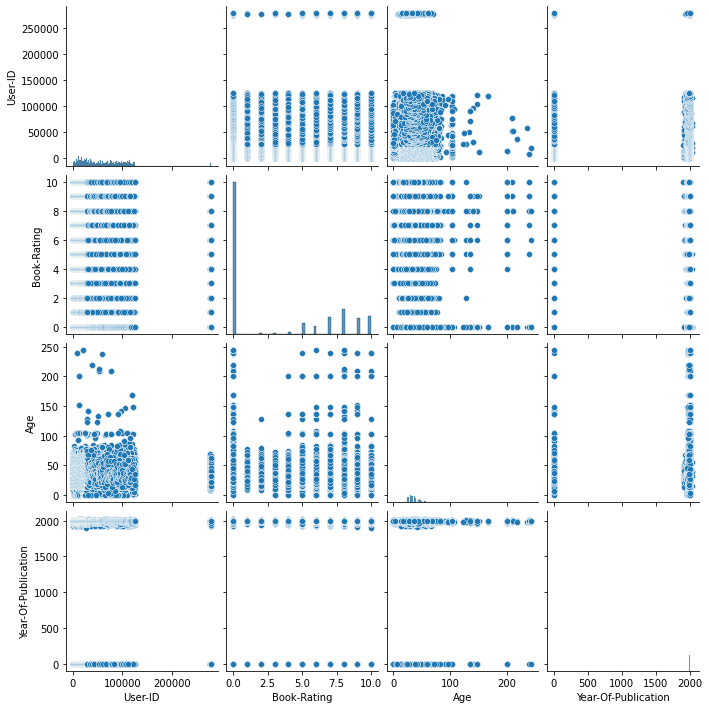

In [23]:
sns.pairplot(data)
plt.show()

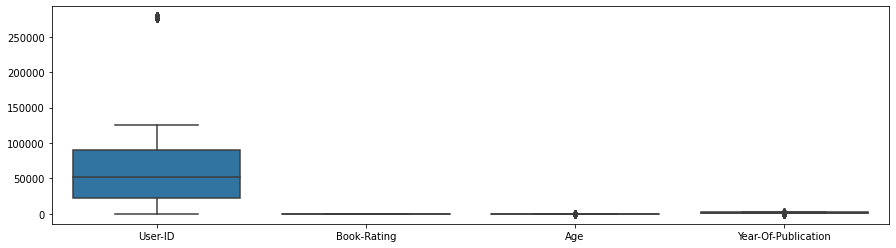

In [26]:
plt.figure(figsize = (15,4))
sns.boxplot(data = data, orient = "v")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


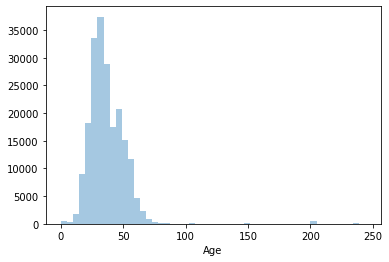

In [27]:
sns.distplot(data['Age'].dropna(), kde=False)

In [29]:
data['Year-Of-Publication'] = pd.to_numeric(data['Year-Of-Publication'], 'coerce').fillna(2099, downcast = 'infer')

In [30]:
data['Book-Rating'] = data['Book-Rating'].replace(0, None)

In [31]:
data['Age'] = np.where(data['Age']>90, None, data['Age'])

In [32]:
data[['Book-Author', 'Publisher']] = data[['Book-Author', 'Publisher']].fillna('Unknown')

In [34]:
data[['Book-Author', 'Publisher']].isnull().sum()

Book-Author    0
Publisher      0
dtype: int64

In [35]:
median = data["Age"].median()
std = data["Age"].std()
is_null = data["Age"].isnull().sum()
rand_age = np.random.randint(median - std, median + std, size = is_null)
age_slice = data["Age"].copy()
age_slice[pd.isnull(age_slice)] = rand_age
data["Age"] = age_slice
data["Age"] = data["Age"].astype(int)

In [36]:
data['Age'].isnull().sum()

0

In [37]:
data['Country'] = data['Location'].apply(lambda row: str(row).split(',')[-1])

In [38]:
data = data.drop('Location', axis=1)

In [39]:
data['Country'].head()

0     usa
1     usa
2     usa
3     usa
4     usa
Name: Country, dtype: object

In [40]:
df = data
# Relevant score
df = df[df['Book-Rating'] >= 6]

In [41]:
# Check
df.groupby('ISBN')['User-ID'].count().describe()

count    45338.000000
mean         5.304866
std         12.170160
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        532.000000
Name: User-ID, dtype: float64

In [42]:
df = df.groupby('ISBN').filter(lambda x: len(x) >= 5)

In [43]:
df.groupby('User-ID')['ISBN'].count().describe()

count    25984.000000
mean         6.948969
std         40.592923
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       3690.000000
Name: ISBN, dtype: float64

In [44]:
df = df.groupby('User-ID').filter(lambda x: len(x) >= 5)

In [45]:
df.shape

(149332, 12)